In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

import tensorflow as tf
from IPython.core.pylabtools import activate_matplotlib
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

df = pd.DataFrame(X, columns=feature_names)
df["target"] = y

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [3]:
# Building Neural network
optimized_model = tf.keras.models.Sequential([
    Dense(units = 32, activation='relu', input_shape=(X_train.shape[1], )),
    Dense(units = 16, activation='relu'),
    Dense(units = 1, activation='sigmoid')
])

C:\Users\sivab\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# Compile the model
optimized_model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = ['accuracy']
)

In [5]:
# Early stopping to avoid overfitting
early_stop = EarlyStopping(
    monitor='val_loss',
    restore_best_weights=True
)

In [6]:
# Train the model
history_optimized_model =  optimized_model.fit(X_train, y_train,
                                               validation_data=(X_test, y_test),
                                               epochs=100,
                                               batch_size=16,
                                               callbacks=[early_stop],
                                               verbose=1)

Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9451 - loss: 0.1688 - val_accuracy: 0.9825 - val_loss: 0.0550
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9758 - loss: 0.0574 - val_accuracy: 0.9649 - val_loss: 0.0899


In [7]:
# Evaluating the model
loss, accuracy = optimized_model.evaluate(X_test, y_test)
print(f"Optimized Model Accuracy: {accuracy*100:.2f} %")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9825 - loss: 0.0550 
Optimized Model Accuracy: 98.25 %


In [8]:
# Predictions
y_pred = (optimized_model.predict(X_test) > 0.5).astype("int32")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


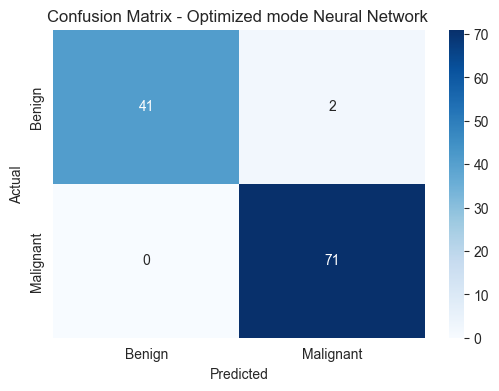

In [9]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Benign','Malignant'],
            yticklabels=['Benign','Malignant'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Optimized mode Neural Network ")
plt.show()

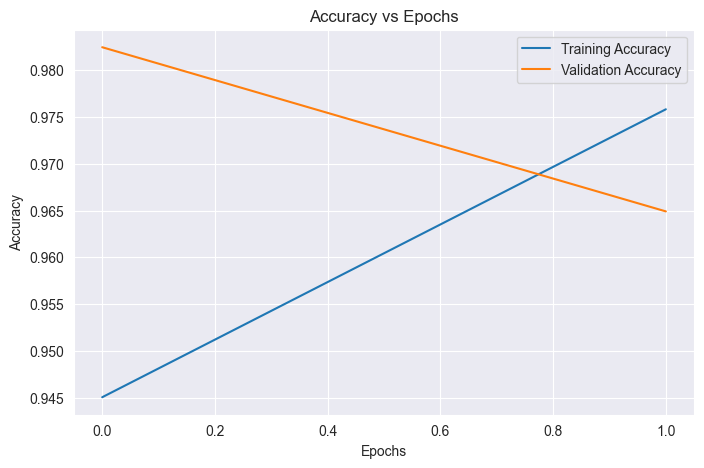

In [10]:
plt.figure(figsize=(8,5))
plt.plot(history_optimized_model.history['accuracy'], label='Training Accuracy')
plt.plot(history_optimized_model.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

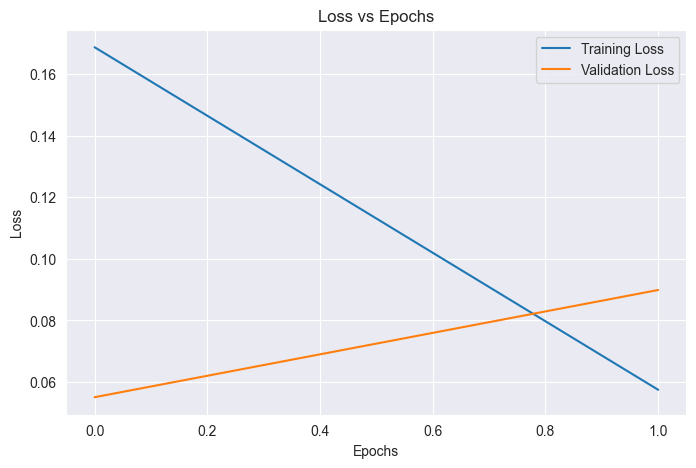

In [11]:
plt.figure(figsize=(8,5))
plt.plot(history_optimized_model.history['loss'], label='Training Loss')
plt.plot(history_optimized_model.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()